# Bài 2: Dùng lại API ở phần 2, viết chương trình bằng R thu thập dữ liệu về thời tiết của TPHCM. Mã zip của TPHCM là: 70000.	


### Preprocess data

In [ ]:
import requests

url = "https://samples.openweathermap.org/data/2.5/forecast/hourly?zip=70000&appid=b6907d289e10d714a6e88b30761fae22"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    weather_data = []
    print(data)
    for item in data['list']:
        row = {
            'time': item['dt_txt'],
            'temperature': item['main']['temp'],
            'humidity': item['main']['humidity'],
            'pressure': item['main']['pressure'],
            'weather': item['weather'][0]['description'],
            'wind_speed': item['wind']['speed']
        }
        weather_data.append(row)
else:
    print("Lỗi:", response.status_code)

{'cod': '200', 'message': 0.0208, 'cnt': 96, 'list': [{'dt': 1553709600, 'main': {'temp': 286.44, 'temp_min': 286.258, 'temp_max': 286.44, 'pressure': 1015.82, 'sea_level': 1015.82, 'grnd_level': 1002.193, 'humidity': 100, 'temp_kf': 0.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 86}, 'wind': {'speed': 5.51, 'deg': 202.816}, 'rain': {'1h': 0.812}, 'sys': {'pod': 'd'}, 'dt_txt': '2019-03-27 18:00:00'}, {'dt': 1553713200, 'main': {'temp': 286.43, 'temp_min': 286.3, 'temp_max': 286.43, 'pressure': 1016.183, 'sea_level': 1016.183, 'grnd_level': 1002.667, 'humidity': 100, 'temp_kf': 0.13}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 92}, 'wind': {'speed': 4.84, 'deg': 206.141}, 'rain': {'1h': 0.625}, 'sys': {'pod': 'd'}, 'dt_txt': '2019-03-27 19:00:00'}, {'dt': 1553716800, 'main': {'temp': 286.6, 'temp_min': 286.507, 'temp_max': 286.6, 'pressure': 1016.462, 'sea_level'

In [50]:
import pandas as pd
df = pd.DataFrame(weather_data)

In [51]:
print(df)

                   time  temperature  humidity  pressure           weather  \
0   2019-03-27 18:00:00      286.440       100  1015.820        light rain   
1   2019-03-27 19:00:00      286.430       100  1016.183        light rain   
2   2019-03-27 20:00:00      286.600       100  1016.462        light rain   
3   2019-03-27 21:00:00      287.970       100  1016.441        light rain   
4   2019-03-27 22:00:00      288.270       100  1016.312        light rain   
..                  ...          ...       ...       ...               ...   
91  2019-03-31 13:00:00      283.921       100  1024.121  scattered clouds   
92  2019-03-31 14:00:00      283.835       100  1024.185  scattered clouds   
93  2019-03-31 15:00:00      285.100       100  1024.272  scattered clouds   
94  2019-03-31 16:00:00      286.995       100  1024.177  scattered clouds   
95  2019-03-31 17:00:00      288.900       100  1023.992  scattered clouds   

    wind_speed  
0         5.51  
1         4.84  
2         4.

## a) Vẽ biểu đồ áp suất không khí (pressure) theo từng ngày.


In [52]:
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

In [53]:
daily_pressure_data = df.groupby('date')['pressure'].mean().reset_index()
print(daily_pressure_data)

         date     pressure
0  2019-03-27  1016.251833
1  2019-03-28  1022.707083
2  2019-03-29  1027.213125
3  2019-03-30  1025.860917
4  2019-03-31  1024.159556


Text(0, 0.5, 'Pressure')

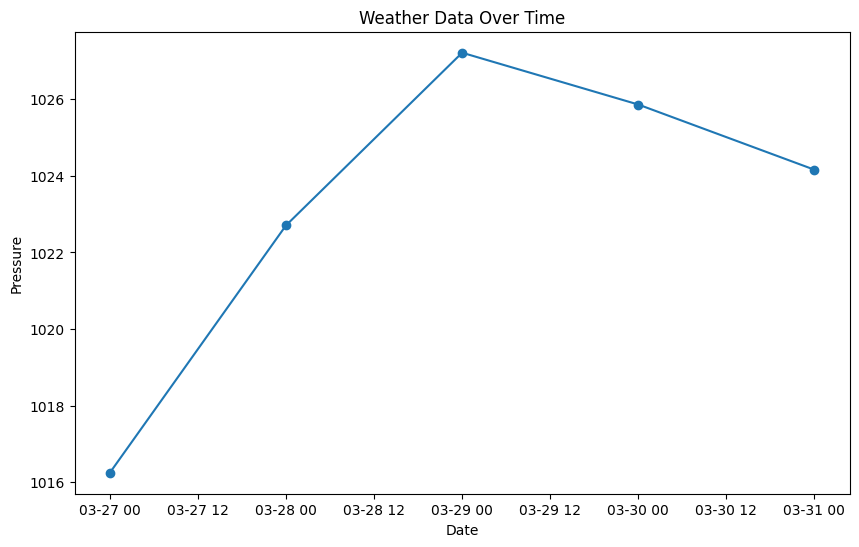

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

Y = daily_pressure_data['pressure']
X = daily_pressure_data['date']
plt.figure(figsize=(10, 6))
plt.plot(X, Y, marker='o', linestyle='-')
plt.title('Weather Data Over Time')
plt.xlabel('Date')
plt.ylabel('Pressure')

## b) Vẽ biểu đồ tốc độ gió (wind speed) theo từng ngày.


In [57]:
daily_wind_speed_data = df.groupby('date')['wind_speed'].mean().reset_index()
print(daily_wind_speed_data)

         date  wind_speed
0  2019-03-27    5.306667
1  2019-03-28    3.914167
2  2019-03-29    2.263750
3  2019-03-30    2.549167
4  2019-03-31    1.764444


Text(0, 0.5, 'Pressure')

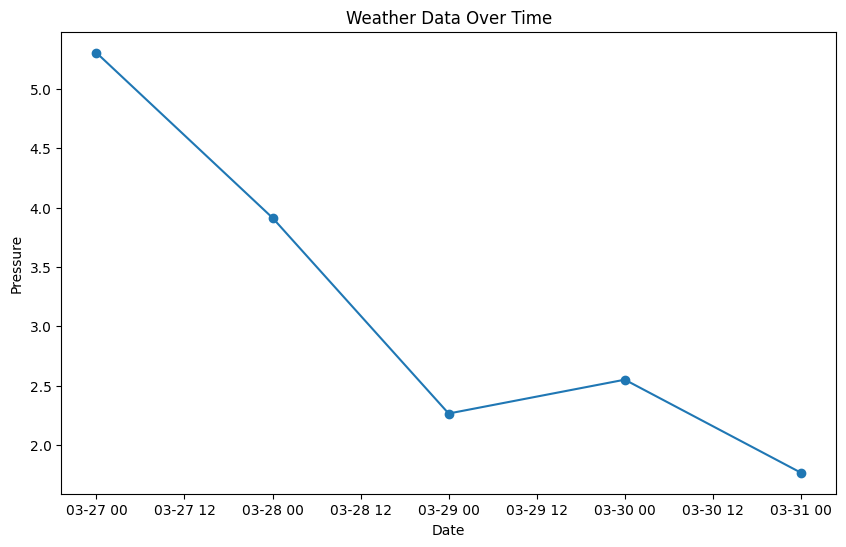

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

Y = daily_wind_speed_data['wind_speed']
X = daily_wind_speed_data['date']
plt.figure(figsize=(10, 6))
plt.plot(X, Y, marker='o', linestyle='-')
plt.title('Weather Data Over Time')
plt.xlabel('Date')
plt.ylabel('Pressure')